In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn 


In [4]:
pd.__version__

'0.25.1'

In [5]:
pip  list


Package                            Version  
---------------------------------- ---------
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.12   
anaconda-project                   0.8.3    
asn1crypto                         1.0.1    
astroid                            2.3.1    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.2.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.6.1    
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.8.0    
bitarray                           1.0.1    
bkcharts                           0.2      
bleach                             3.1.0    
bokeh     

In [7]:
install --upgrade pandas

SyntaxError: invalid syntax (<ipython-input-7-193376818431>, line 1)

In [2]:
reads = pd.read_csv("books.csv")


# Data Overview

In [3]:
reads.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9.780000e+12,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9.780000e+12,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.780000e+12,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9.780000e+12,eng,435,2149872,33964,NaN


### Columns Description:
<b>bookID</b> Contains the unique ID for each book/series.
 
<b>title</b> contains the titles of the books.

<b>authors</b> contains the author of the particular book.

<b>average_rating</b> the average rating of the books, as decided by the users.

<b>ISBN ISBN(10)</b> number, tells the information about a book - such as edition and publisher.

<b>ISBN 13</b> The new format for ISBN, implemented in 2007. 13 digits.

<b>language_code</b> Tells the language for the books.

<b>Num_pages</b> Contains the number of pages for the book.

<b>Ratings_count</b> Contains the number of ratings given for the book.

<b>text_reviews_count</b> Has the count of reviews left by users.


In [4]:
reads.dtypes
#already we can see that we will need to convert a few coulmns 

bookID                  int64
title                  object
authors                object
average_rating         object
isbn                   object
isbn13                float64
language_code          object
# num_pages            object
ratings_count           int64
text_reviews_count      int64
Unnamed: 10           float64
dtype: object

In [5]:
reads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13716 entries, 0 to 13715
Data columns (total 11 columns):
bookID                13716 non-null int64
title                 13716 non-null object
authors               13716 non-null object
average_rating        13716 non-null object
isbn                  13716 non-null object
isbn13                13716 non-null float64
language_code         13716 non-null object
# num_pages           13716 non-null object
ratings_count         13716 non-null int64
text_reviews_count    13716 non-null int64
Unnamed: 10           1 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.2+ MB


In [6]:
#reads[reads['# num_pages']=="eng"]

#cheacking if there are any duplicates in our data
reads.duplicated().any()

False

In [7]:
#checking how many nulls we have in our data
reads.isnull().sum(axis=0)

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
# num_pages               0
ratings_count             0
text_reviews_count        0
Unnamed: 10           13715
dtype: int64

# Data Cleaning

In [8]:
# after investigating why there is 1 non-null on column "Unnamed: 10"
# we can spare droping the troubling row

reads =reads.drop(reads.index[5686])

In [9]:
# fixing the duplicate in J.K Rowling that we spotted on the head of the data
reads.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

In [10]:
reads['language_code'].unique()
#making sure there would be no confusioun with the bookID while applaying the machine learning


array(['eng', 'en-US', 'spa', 'fre', 'en-GB', 'mul', 'ger', 'ara', 'por',
       'grc', 'en-CA', 'enm', 'jpn', 'dan', 'zho', 'nl', 'ita', 'lat',
       'srp', 'rus', 'tur', 'msa', 'swe', 'glg', 'cat', 'wel', 'heb',
       'nor', 'gla', 'ale'], dtype=object)

In [11]:
reads.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,439785960,9.780000e+12,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.780000e+12,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,439554934,9.780000e+12,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9.780000e+12,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,043965548X,9.780000e+12,eng,435,2149872,33964,NaN


# Data Adjusting

In [12]:

#Dropping irrelevant columns to the project ( including title and authors so not to confuse the model)

# else could have done 
#le = preprocessing.LabelEncoder()
#reads['title'] = le.fit_transform(reads['title'])


reads = reads.drop(columns=['title','authors','Unnamed: 10','isbn', 'isbn13','bookID'])


In [13]:
reads.head()

,average_rating,language_code,# num_pages,ratings_count,text_reviews_count
0,4.56,eng,652,1944099,26249
1,4.49,eng,870,1996446,27613
2,4.47,eng,320,5629932,70390
3,4.41,eng,352,6267,272
4,4.55,eng,435,2149872,33964


In [14]:
le = preprocessing.LabelEncoder()
reads['language_code'] = le.fit_transform(reads['language_code'])

# transforming back
# reads['language_code']=le.inverse_transform(reads['language_code'])
reads = pd.get_dummies(reads, columns=['language_code'])


In [16]:
# Casting Obj to Int, float for rounding 
reads['# num_pages']=reads['# num_pages'].astype(int)
reads['average_rating']=reads['average_rating'].astype(float)
#reads['average_rating']=pd.to_numeric(reads['average_rating'],errors='coerce')


In [17]:
#rounding the average rating, and casting from float to int
reads['average_rating'] = reads['average_rating'].round()
reads['average_rating']=reads['average_rating'].astype(int)
#reads['average_rating']=reads['average_rating'].astype()


In [192]:
rating_categoris =list(reads['average_rating'].unique())
print ("rating_categoris: ",rating_categoris)

rating_categoris:  [5, 4, 3, 0, 2, 1]


# Machine Learning Model


In [112]:
y= reads['average_rating']
X=reads.drop(['average_rating'],axis = 1)

In [119]:
# y = Label(output) = average_rating
# X = features(input) = language_codes, num_pages, ratings_count, text_reviews_count.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(10972, 33) (10972,)
(2743, 33) (2743,)


# K-nearest neighbors
The general idea behind K-nearest neighbors (KNN) is that data points are considered to belong to the class with which it shares the most number of common points in terms of its distance. K number of nearest points around the data point to be predicted are taken into consideration.

In [120]:
#importing the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

# importing metric model to check the accuracy
from sklearn import metrics
#running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

0.911410864017499

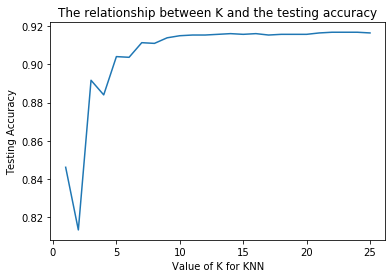

In [121]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('The relationship between K and the testing accuracy')
scores[7]

In [158]:
# i choose k=7 based on the Accuracy score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [159]:
results = confusion_matrix(y_test, y_pred)

print ('Accuracy Score :',metrics.accuracy_score(y_test, y_pred))

print ('Confusion Matrix :',results)

print ('Report : ',metrics.classification_report(y_test, y_pred))

Accuracy Score : 0.911410864017499
Confusion Matrix : [[   0    0    0    0   11    0]
 [   0    0    0    1    0    0]
 [   1    0    0    0    1    0]
 [   0    0    0    2  162    1]
 [   2    0    0   15 2498    0]
 [   0    0    0    1   48    0]]
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.11      0.01      0.02       165
           4       0.92      0.99      0.95      2515
           5       0.00      0.00      0.00        49

    accuracy                           0.91      2743
   macro avg       0.17      0.17      0.16      2743
weighted avg       0.85      0.91      0.88      2743



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### The Problem
 i have encountered a problem in the model which is that it dosent sample all classes in the same amount for the testing 
 and therefor not able to predict them - the model is biased.

i will try and rise the testing group to 30% 
in order to get more classes in the testing group.


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9600, 33) (9600,)
(4115, 33) (4115,)


Text(0.5, 1.0, 'The New relationship between K and the testing accuracy- 30% testing')

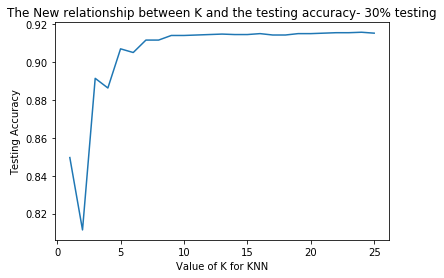

In [174]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('The New relationship between K and the testing accuracy- 30% testing')    

In [177]:
# i choose k=7 based on the Accuracy score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

results = confusion_matrix(y_test, y_pred)

print ('Accuracy Score :\n',metrics.accuracy_score(y_test, y_pred))

print ('Confusion Matrix :\n',results)

print ('Report :\n',metrics.classification_report(y_test, y_pred))

Accuracy Score :
 0.911543134872418
Confusion Matrix :
 [[   1    0    0    0   13    0]
 [   0    0    0    1    0    0]
 [   1    0    0    2    4    0]
 [   0    0    0    3  251    1]
 [   2    0    0   17 3747    1]
 [   0    0    0    1   70    0]]
Report :
               precision    recall  f1-score   support

           0       0.25      0.07      0.11        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         7
           3       0.12      0.01      0.02       255
           4       0.92      0.99      0.95      3767
           5       0.00      0.00      0.00        71

    accuracy                           0.91      4115
   macro avg       0.22      0.18      0.18      4115
weighted avg       0.85      0.91      0.88      4115



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


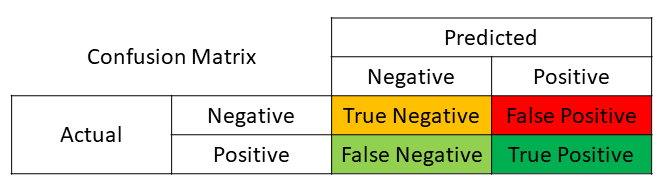

In [184]:
# Confusion Matrix Index
from IPython.display import Image
Image("confusion matrix.png")

## Random Forest
### reasons to use Random Forest method:
*It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

*The algorithm can be used in both classification and regression problems.

*You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [190]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred))

results = confusion_matrix(y_test, y_pred)

print ('Confusion Matrix :\n',results)

print ('Report :\n',metrics.classification_report(y_test, y_pred))

Accuracy: 0.9078979343863912
Confusion Matrix :
 [[   5    0    1    1    6    1]
 [   0    0    0    0    0    1]
 [   0    0    1    0    6    0]
 [   1    0    0    6  246    2]
 [   1    2    2   32 3718   12]
 [   0    0    0    0   65    6]]
Report :
               precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.00      0.00      0.00         1
           2       0.25      0.14      0.18         7
           3       0.15      0.02      0.04       255
           4       0.92      0.99      0.95      3767
           5       0.27      0.08      0.13        71

    accuracy                           0.91      4115
   macro avg       0.39      0.27      0.30      4115
weighted avg       0.86      0.91      0.88      4115



In [ ]:
# from the Random Forest 